Chapter 17
# 度分析，空手道俱乐部
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
G = nx.karate_club_graph() 
# 空手道俱乐部图
pos = nx.spring_layout(G,seed=2) 

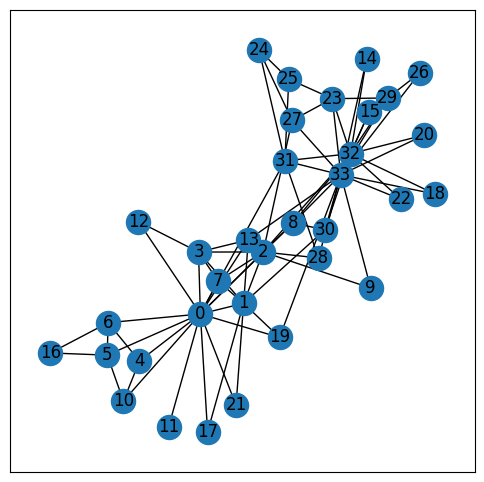

In [4]:
plt.figure(figsize = (6,6))

nx.draw_networkx(G, pos)
plt.savefig('全图.svg')

## 度分析

In [5]:
degree_sequence = sorted((d for n, d in G.degree()), 
                         reverse=True)
# 度数大小排序

In [6]:
dmax = max(degree_sequence)

In [7]:
dict_degree = dict(G.degree())
# 将结果转为字典

In [8]:
pd.DataFrame(list(dict_degree.items()), columns=['Key', 'Values'])

,Key,Values
0,0,16
1,1,9
2,2,10
3,3,6
4,4,3
5,5,4
6,6,4
7,7,4
8,8,5
9,9,2


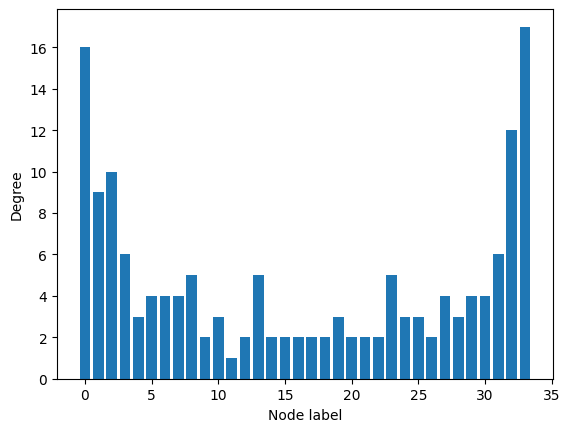

In [10]:
# 每个节点的具体度数
plt.bar(dict_degree.keys(),dict_degree.values())
plt.xlabel('Node label')
plt.ylabel('Degree')
plt.savefig('节点度数bar chart.svg')

In [7]:
set(degree_sequence)

{1, 2, 3, 4, 5, 6, 9, 10, 12, 16, 17}

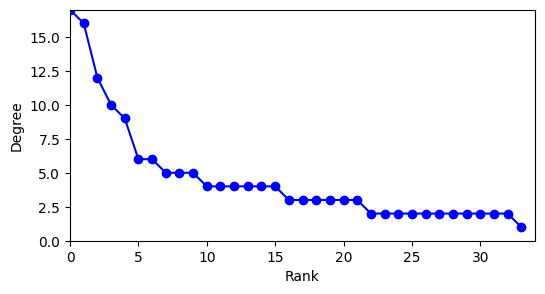

In [8]:
fig, ax = plt.subplots(figsize = (6,3))
ax.plot(degree_sequence, "b-", marker="o")
ax.set_ylabel("Degree")
ax.set_xlabel("Rank")
ax.set_xlim(0,34)
ax.set_ylim(0,17)
plt.savefig('度数等级图.svg')

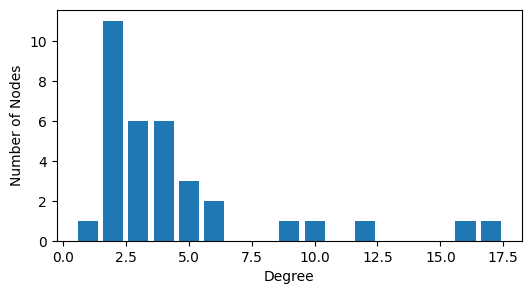

In [9]:
fig, ax = plt.subplots(figsize = (6,3))
ax.bar(*np.unique(degree_sequence, return_counts=True))
ax.set_xlabel("Degree")
ax.set_ylabel("Number of Nodes")
plt.savefig('度数直方图.svg')

## 根据度数渲染节点

In [10]:
# 自定义函数，过滤dict
def filter_value(dict_, unique):
    
    newDict = {}
    for (key, value) in dict_.items():
        if value == unique:
            newDict[key] = value
            
    return newDict

C:\Users\james\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


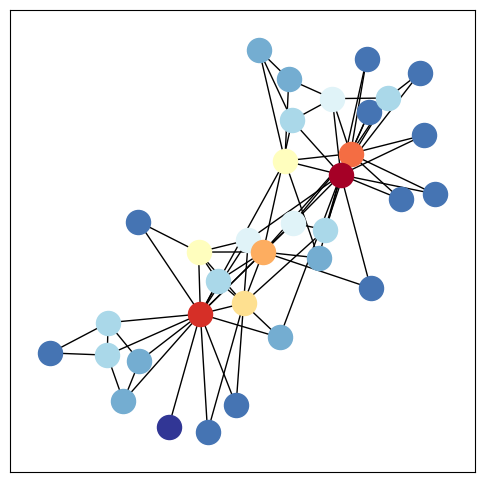

In [11]:
# 根据度数大小渲染节点
unique_deg = set(degree_sequence)
# 取出节点度数独特值

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(unique_deg)))
# 独特值的颜色映射

plt.figure(figsize = (6,6))
nx.draw_networkx_edges(G, pos)
# 绘制图的边

# 分别绘制不同度数节点
for deg_i, color_i in zip(unique_deg,colors):
    
    dict_i = filter_value(dict_degree,deg_i)
    nx.draw_networkx_nodes(G, pos, 
                           nodelist = list(dict_i.keys()), 
                           node_color = color_i)
plt.savefig('根据度数大小渲染节点.svg')